# 서울시 모기발생상황 지표 예측
https://www.datamanim.com/dataset/03_dataq/q2/mos/main.html

In [167]:
import pandas as pd
train_x =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/train_x.csv',encoding='euc-kr')
train_y =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/train_y.csv',encoding='euc-kr')
test_x =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/test_x.csv',encoding='euc-kr')
sub    =pd.read_csv('https://raw.githubusercontent.com/Datamanim/mosquito/main/sub.csv')

## 데이터셋 확인

In [168]:
train_x.head()

,date,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,2019-12-31,0.0,-7.9,-10.9,-4.5
1,2019-12-30,0.4,2.7,-5.7,6.8
2,2019-12-29,1.4,3.8,1.1,6.2
3,2019-12-27,0.0,-1.7,-4.6,2.6
4,2019-12-25,0.0,2.0,-2.7,6.6


In [169]:
train_y.head()

,date,mosquito_ratio
0,2019-12-31,5.5
1,2019-12-30,5.5
2,2019-12-29,5.5
3,2019-12-27,5.5
4,2019-12-25,5.5


In [170]:
test_x.head()

,date,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
0,2016-05-01,0.0,18.8,12.2,26.0
1,2016-05-25,0.0,19.7,15.3,24.4
2,2016-06-06,0.0,23.3,20.8,28.4
3,2016-06-09,0.0,24.1,17.8,31.3
4,2016-06-10,0.0,24.6,20.2,31.3


In [171]:
sub.head()

,date,mosquito_ratio
0,2016-05-01,0
1,2016-05-25,0
2,2016-06-06,0
3,2016-06-09,0
4,2016-06-10,0


In [172]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     1016 non-null   object 
 1   강수량(mm)  1016 non-null   float64
 2   평균기온(℃)  1016 non-null   float64
 3   최저기온(℃)  1016 non-null   float64
 4   최고기온(℃)  1016 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.8+ KB


In [174]:
train_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1016 non-null   object 
 1   mosquito_ratio  1016 non-null   float64
dtypes: float64(1), object(1)
memory usage: 16.0+ KB


In [175]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     300 non-null    object 
 1   강수량(mm)  300 non-null    float64
 2   평균기온(℃)  300 non-null    float64
 3   최저기온(℃)  300 non-null    float64
 4   최고기온(℃)  300 non-null    float64
dtypes: float64(4), object(1)
memory usage: 11.8+ KB


In [176]:
train_x.describe()
# 강수량이 매우 불균등함 

,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃)
count,1016.000000,1016.000000,1016.000000,1016.000000
mean,3.566240,14.000886,9.833465,18.924902
std,13.489043,10.988587,11.161832,11.126918
min,0.000000,-14.800000,-17.800000,-10.700000
25%,0.000000,4.300000,0.200000,9.200000
50%,0.000000,16.250000,11.000000,21.700000
75%,0.500000,23.300000,19.425000,28.200000
max,144.500000,33.600000,30.000000,39.600000


## 데이터 전처리

(array([949.,  31.,  14.,   4.,   8.,   2.,   4.,   1.,   0.,   3.]),
 array([  0.  ,  14.45,  28.9 ,  43.35,  57.8 ,  72.25,  86.7 , 101.15,
        115.6 , 130.05, 144.5 ]),
 <BarContainer object of 10 artists>)

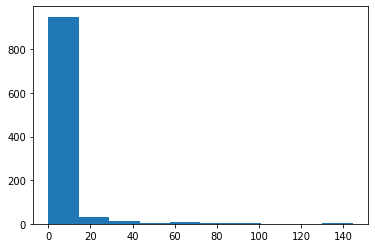

In [178]:
import matplotlib.pyplot as pyt

pyt.hist(train_x['강수량(mm)'])

In [179]:
train_y.describe()

,mosquito_ratio
count,1016.000000
mean,251.003248
std,298.444928
min,0.000000
25%,5.500000
50%,91.900000
75%,477.925000
max,1000.000000


(array([795.,  34.,  35.,  43.,  30.,  27.,  21.,  12.,  11.,   8.]),
 array([0.        , 0.49801761, 0.99603522, 1.49405283, 1.99207043,
        2.49008804, 2.98810565, 3.48612326, 3.98414087, 4.48215848,
        4.98017609]),
 <BarContainer object of 10 artists>)

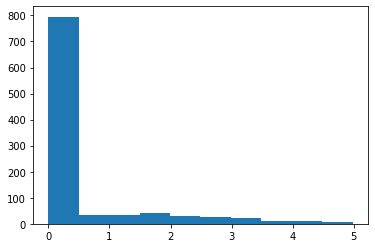

In [180]:
# 강수량 로그변환 
import numpy as np

logged = np.log1p(train_x['강수량(mm)'])
pyt.hist(logged)
# 비가 안올땐 강수량이 0이라 0인 값이 많아 로그변환이 의미 없음 

In [184]:
# datetime 객체 분리 
train_x['date'] = train_x['date'].apply(pd.to_datetime)

train_x['year'] = train_x['date'].apply(lambda x : x.year)
train_x['month'] = train_x['date'].apply(lambda x : x.month)
train_x['day'] = train_x['date'].apply(lambda x : x.day)

In [185]:
train_x.drop(['date'], axis=1, inplace=True)

In [187]:
# datetime 객체 분리 
test_x['date'] = test_x['date'].apply(pd.to_datetime)

test_x['year'] = test_x['date'].apply(lambda x : x.year)
test_x['month'] = test_x['date'].apply(lambda x : x.month)
test_x['day'] = test_x['date'].apply(lambda x : x.day)

test_x.drop(['date'], axis=1, inplace=True)

In [198]:
test_x

,강수량(mm),평균기온(℃),최저기온(℃),최고기온(℃),year,month,day
0,0.0,18.8,12.2,26.0,2016,5,1
1,0.0,19.7,15.3,24.4,2016,5,25
2,0.0,23.3,20.8,28.4,2016,6,6
3,0.0,24.1,17.8,31.3,2016,6,9
4,0.0,24.6,20.2,31.3,2016,6,10
...,...,...,...,...,...,...,...
295,0.0,2.7,-0.1,6.4,2019,12,14
296,0.0,-0.8,-4.5,3.1,2019,12,19
297,2.9,3.4,0.3,5.2,2019,12,23
298,0.3,2.0,-2.4,4.1,2019,12,26


In [188]:
# 범주형 변수가 없으니 인코딩을 딱히 할건 없음. 스케일링 ㄱㄱ
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(train_x)
train_x_scaled = sc.transform(train_x)
test_x_scaled = sc.transform(test_x)

In [194]:
train_x_scaled[:, 0]

array([-0.26451072, -0.23484242, -0.16067167, ..., -0.26451072,
        1.73809965,  0.95930673])

(array([949.,  31.,  14.,   4.,   8.,   2.,   4.,   1.,   0.,   3.]),
 array([-0.26451072,  0.80725668,  1.87902408,  2.95079149,  4.02255889,
         5.0943263 ,  6.1660937 ,  7.23786111,  8.30962851,  9.38139591,
        10.45316332]),
 <BarContainer object of 10 artists>)

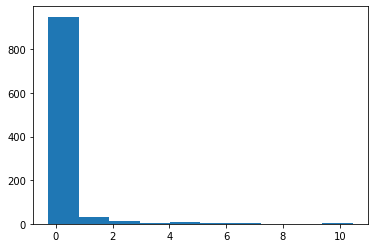

In [193]:
pyt.hist(train_x_scaled[:, 0])
# 강수량은 딱히 달라지지 않음. 새로운 방법이 필요할듯. 

## 회귀 - 학습, 예측, 평가

In [200]:
# 라벨데이터 date 빼내기
tain_y_cleaned = train_y.drop(['date'], axis=1)

In [206]:
# 검증데이터 생성 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x_scaled, tain_y_cleaned,
                                                   test_size=0.2, random_state=131)

In [213]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------

In [250]:
# 제일 만만한 랜덤포레스트 
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500, min_samples_split=3)
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test) # 회귀는 predict_proba 지원 X

<ipython-input-250-f734b4937fe8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


In [246]:
# 평가 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('mse : {:0.3f}'.format(mean_squared_error(pred, y_test)))
print('mse : {:0.3f}'.format(r2_score(pred, y_test)))

mse : 5756.837
mse : 0.929


In [245]:
# cross_val_score
from sklearn.model_selection import cross_val_score

neg_mse = cross_val_score(rf_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
mse = -1 * neg_mse_scores
mse


/Users/linakim/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linakim/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linakim/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/linakim/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection

array([12.46030057, 26.04862111, 33.07413798, 80.76237112, 33.31360656])

In [251]:
# test_X 예측
pred_test = rf_reg.predict(test_x_scaled) 

In [252]:
# csv로 합치기 
sub['mosquito_ratio'] = pred_test

In [253]:
sub.head()

,date,mosquito_ratio
0,2016-05-01,240.064808
1,2016-05-25,443.467813
2,2016-06-06,601.144770
3,2016-06-09,572.022223
4,2016-06-10,594.485907


In [254]:
sub.to_csv('mosquito_rate.csv')